# Real Estate Price Prediction

A) Import Necessary Libraries.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import joblib
import pandas as pd

B) Load Cleaned Dataset.

In [2]:
# Load dataset (update the file path)
df = pd.read_excel(r"D:\DINESH_DATA_SCIENCE\MY_PROJECT\REAL ESTATE PRICE PREDICTION\Real_Estate_Data_V21.xlsx")

# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  6 non-null      object 
 1   Property Title        14528 non-null  object 
 2   Total_Area            14528 non-null  int64  
 3   Price_per_SQFT        14528 non-null  float64
 4   Baths                 14528 non-null  int64  
 5   Balcony               14528 non-null  object 
 6   Mark_in_City          14528 non-null  object 
 7   City                  14528 non-null  object 
 8   State                 14528 non-null  object 
 9   Country               14528 non-null  object 
 10  Bedrooms              14528 non-null  float64
 11  House/Flat/Villa      14528 non-null  object 
 12  Property_Type         14528 non-null  object 
 13  Hall                  14528 non-null  int64  
 14  Kitchen               14528 non-null  int64  
 15  Studio/Shop        

C) Verify The Selected Features in Cleaned Dataset is Empty or Not.

In [3]:
print(df.isnull().any())

Name                     True
Property Title          False
Total_Area              False
Price_per_SQFT          False
Baths                   False
Balcony                 False
Mark_in_City            False
City                    False
State                   False
Country                 False
Bedrooms                False
House/Flat/Villa        False
Property_Type           False
Hall                    False
Kitchen                 False
Studio/Shop             False
Price (in Thousands)    False
dtype: bool


D) Distinguish categorical columns

In [4]:
# Distinguish categorical columns
categorical_columns = df.select_dtypes(include=['object'])
# checking if any value is missing in categorical columns
print(categorical_columns.isnull().any(axis=0))

Name                 True
Property Title      False
Balcony             False
Mark_in_City        False
City                False
State               False
Country             False
House/Flat/Villa    False
Property_Type       False
dtype: bool


In [5]:
print(list(categorical_columns))

['Name', 'Property Title', 'Balcony', 'Mark_in_City', 'City', 'State', 'Country', 'House/Flat/Villa', 'Property_Type']


E) Data Visualization (EDA) of target variable based on Catergorical Columns

* Price Distribution

<Figure size 800x500 with 0 Axes>

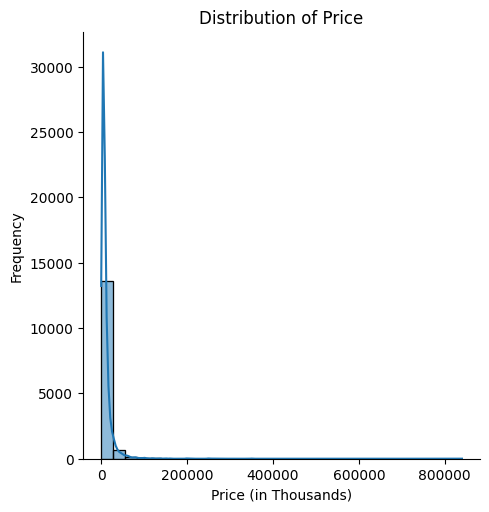

In [6]:
plt.figure(figsize=(8, 5))
sns.displot(df['Price (in Thousands)'], bins=30, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price (in Thousands)")
plt.ylabel("Frequency")
plt.show()

I. Impact of Balcony on Price (in Thousands)

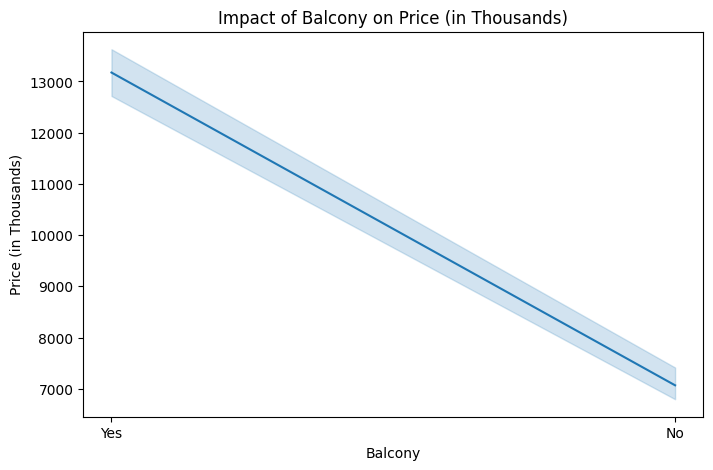

In [7]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Balcony', y='Price (in Thousands)', data=df)
plt.title("Impact of Balcony on Price (in Thousands)")
plt.show()

II. Impact of City on Price (in Thousands)

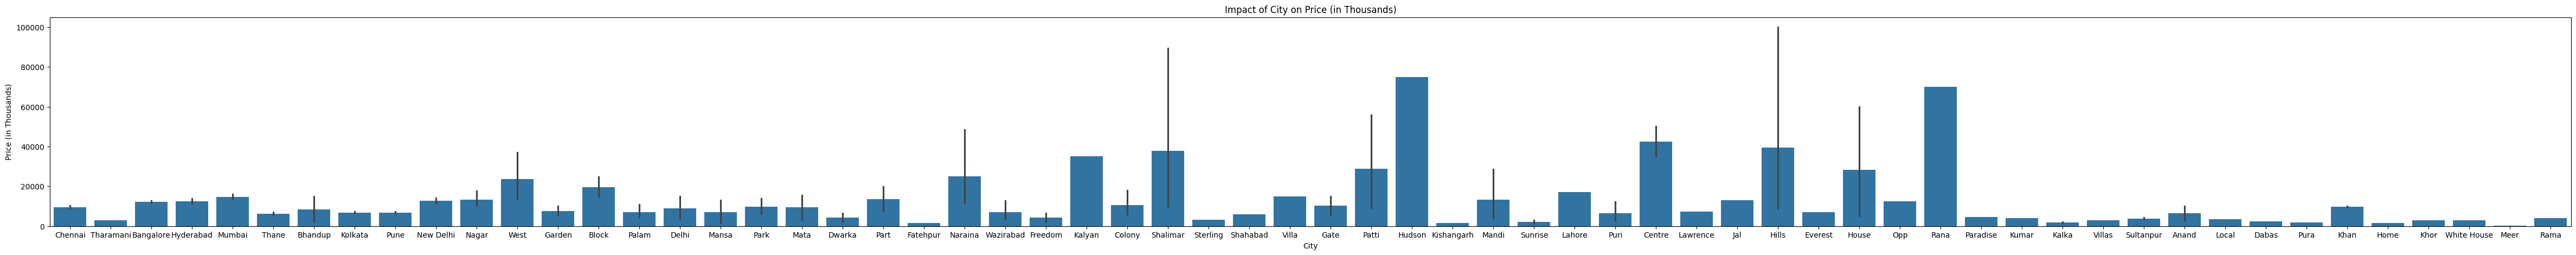

In [8]:
plt.figure(figsize=(60, 5))
sns.barplot(x='City', y='Price (in Thousands)', data=df)
plt.title("Impact of City on Price (in Thousands)")
plt.show()

III. Impact of State on Price (in Thousands)

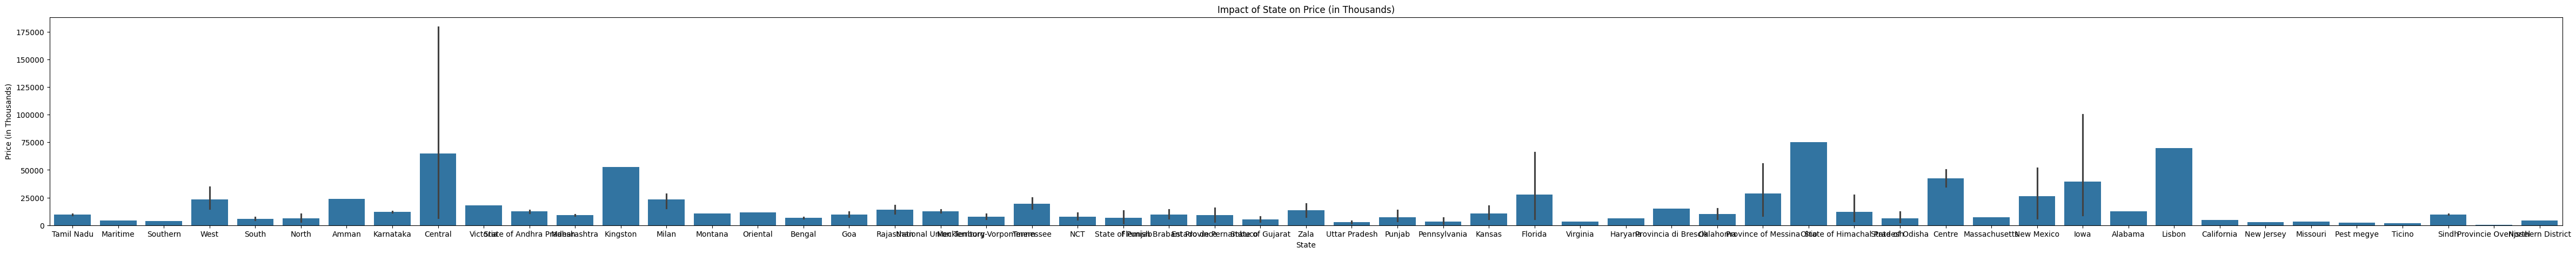

In [9]:
plt.figure(figsize=(60, 5))
sns.barplot(x='State', y='Price (in Thousands)', data=df)
plt.title("Impact of State on Price (in Thousands)")
plt.show()

IV. Impact of House/Flat/Villa on Price (in Thousands)

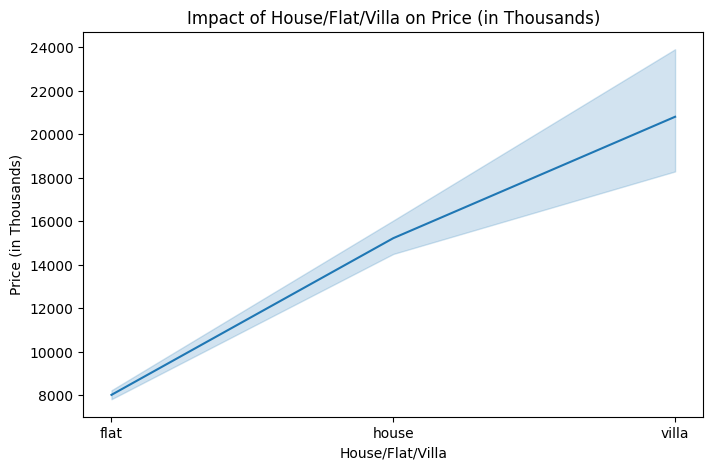

In [10]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='House/Flat/Villa', y='Price (in Thousands)', data=df)
plt.title("Impact of House/Flat/Villa on Price (in Thousands)")
plt.show()

V. Impact of Property_Type on Price (in Thousands)

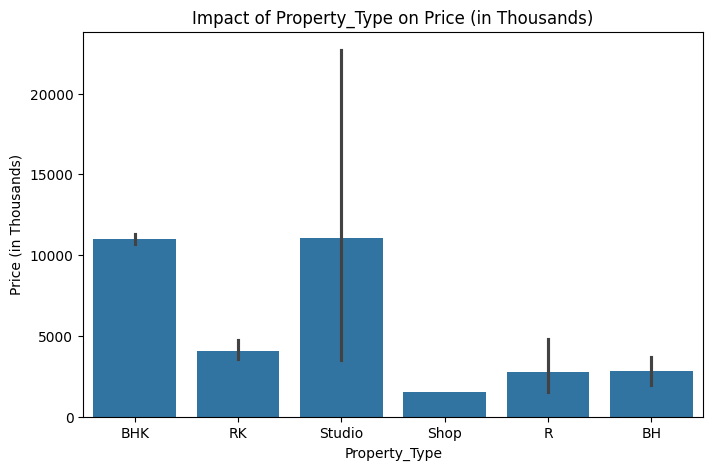

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Property_Type', y='Price (in Thousands)', data=df)
plt.title("Impact of Property_Type on Price (in Thousands)")
plt.show()

F) Distinguish numerical columns

In [12]:
# Distinguishing numerical columns
numerical_columns = df.select_dtypes(include=['number'])
# checking if any value is missing in categorical columns
print(numerical_columns.isnull().any(axis=0))

Total_Area              False
Price_per_SQFT          False
Baths                   False
Bedrooms                False
Hall                    False
Kitchen                 False
Studio/Shop             False
Price (in Thousands)    False
dtype: bool


G) Data Visualization (EDA) of target variable based on Numerical Columns

I. Price Distribution

<Figure size 800x500 with 0 Axes>

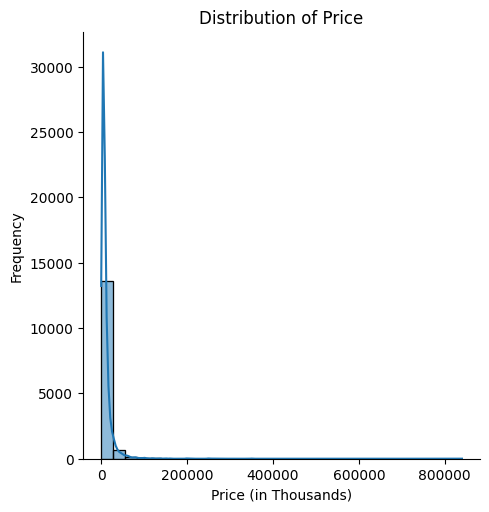

In [13]:
plt.figure(figsize=(8, 5))
sns.displot(df['Price (in Thousands)'], bins=30, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price (in Thousands)")
plt.ylabel("Frequency")
plt.show()

I. Impact of Total_Area on Price (in Thousands)

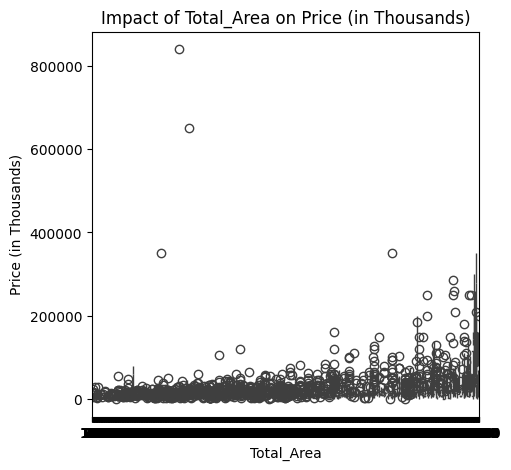

In [14]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Total_Area', y='Price (in Thousands)', data=df)
plt.title("Impact of Total_Area on Price (in Thousands)")
plt.show()

II. Impact of Price_per_SQFT on Price (in Thousands)

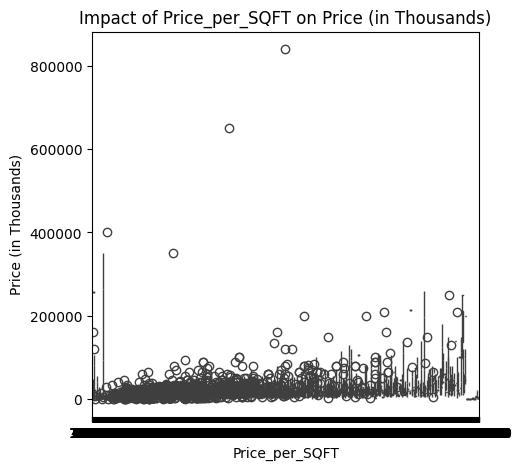

In [15]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Price_per_SQFT', y='Price (in Thousands)', data=df)
plt.title("Impact of Price_per_SQFT on Price (in Thousands)")
plt.show()

III. Impact of Baths on Price (in Thousands)

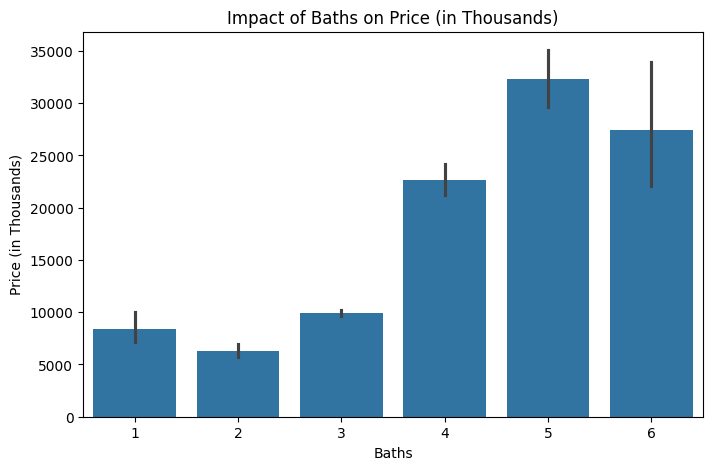

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Baths', y='Price (in Thousands)', data=df)
plt.title("Impact of Baths on Price (in Thousands)")
plt.show()

IV. Impact of Bedrooms on Price (in Thousands)

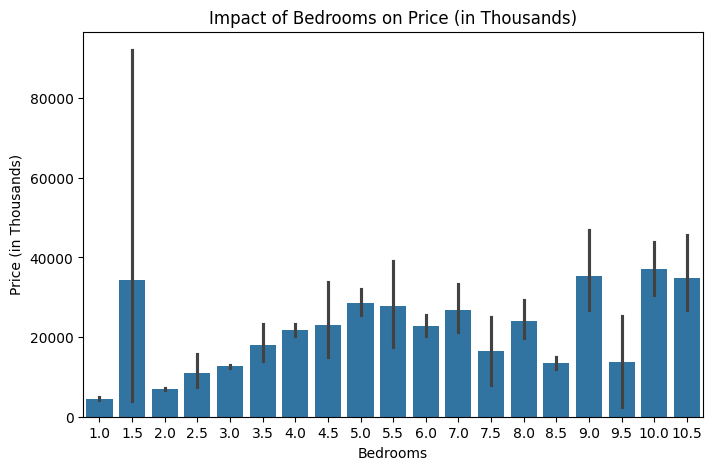

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Bedrooms', y='Price (in Thousands)', data=df)
plt.title("Impact of Bedrooms on Price (in Thousands)")
plt.show()

V. Impact of Hall on Price (in Thousands)

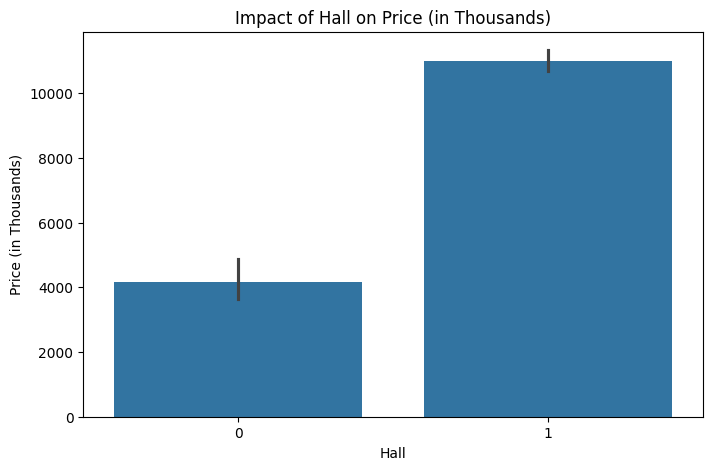

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Hall', y='Price (in Thousands)', data=df)
plt.title("Impact of Hall on Price (in Thousands)")
plt.show()

VI. Impact of Kitchen on Price (in Thousands)

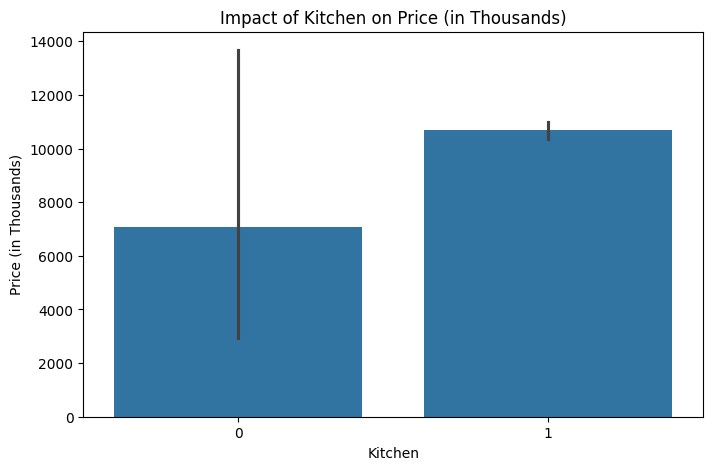

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Kitchen', y='Price (in Thousands)', data=df)
plt.title("Impact of Kitchen on Price (in Thousands)")
plt.show()

VII. Impact of Studio/Shop on Price (in Thousands)

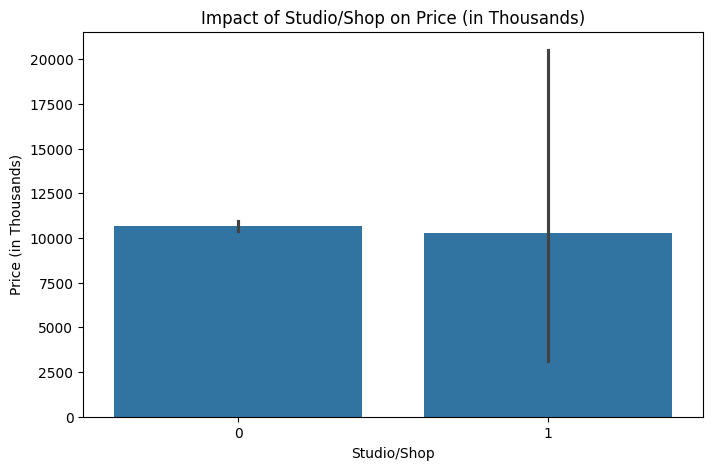

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Studio/Shop', y='Price (in Thousands)', data=df)
plt.title("Impact of Studio/Shop on Price (in Thousands)")
plt.show()

H) Label Encoding for Features in Python

In [21]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Balcony', 'City', 'State', 'House/Flat/Villa', 'Property_Type']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for later use

I) Select Features & Split Data

In [22]:
# Define feature columns and target variable
features = ['Total_Area', 'Price_per_SQFT', 'Baths', 'Balcony', 
            'City', 'State', 'Property_Type', 'Bedrooms', 
            'Hall', 'Kitchen', 'Studio/Shop', 'House/Flat/Villa']

X = df[features]  # Feature matrix
y = df['Price (in Thousands)']  # Target variable

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

J) Train Regression Models

* Linear Regression

In [23]:
# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Model Evaluation
print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

Linear Regression Performance:
MAE: 5740.84
MSE: 139449017.94
R² Score: 0.29


* Random Forest Regression (Better for Non-Linear Data)

In [24]:
# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=13)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.2f}")


Random Forest Performance:
MAE: 695.65
MSE: 89039962.07
R² Score: 0.55


* Feature Importance (For Tree-Based Models)

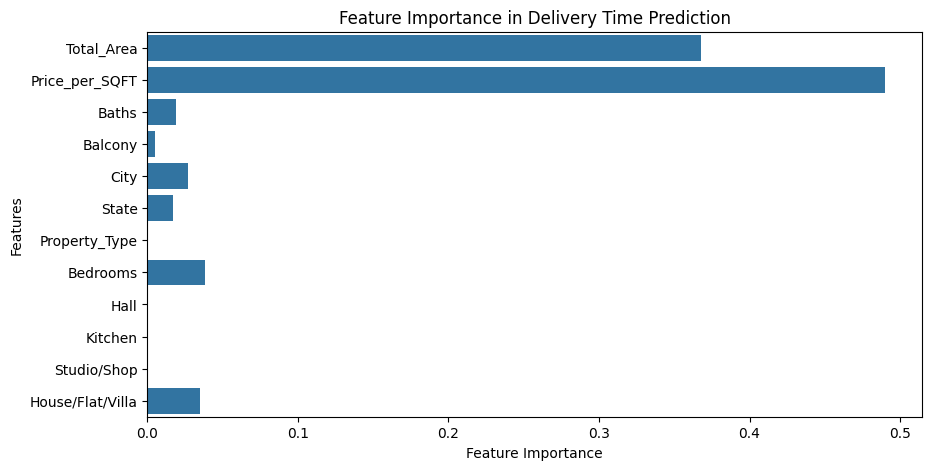

In [25]:
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Delivery Time Prediction")
plt.show()

* Gradient Boosting (More Advanced Model)

In [26]:
# Train model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Model Evaluation
print("Gradient Boosting Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gb):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_gb):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_gb):.2f}")

Gradient Boosting Performance:
MAE: 1365.45
MSE: 51254539.58
R² Score: 0.74


* Next Steps
    * Compare Models: Identify the best-performing model based on R² score, MAE, and MSE.

    * Hyperparameter Tuning: Use GridSearchCV to fine-tune the best model.

    * Deploy Model: If required, I can help with saving & deploying the model using Flask or FastAPI.

K) Hyperparameter Tuning & Model Deployment

* Since Random Forest and Gradient Boosting are more effective for non-linear data.
* let’s optimize them using GridSearchCV. 
* Hyperparameter Tuning using GridSearchCV.

In [28]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples at a leaf node
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train final model with best parameters
best_rf = grid_search.best_estimator_

# Predict
y_pred_best = best_rf.predict(X_test)

# Evaluate final tuned model
print("Tuned Random Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_best):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_best):.2f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Random Forest Performance:
MAE: 794.68
MSE: 65178558.74
R² Score: 0.67


To improve the performance of Gradient Boosting model, We can try the following techniques:

* Gradient Boosting has several hyperparameters that can be optimized to improve performance. 
* Use GridSearchCV or RandomizedSearchCV to find the best combination of hyperparameters.

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_gb_model = grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Performance After Tuning:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gb):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_gb):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_gb):.2f}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Gradient Boosting Performance After Tuning:
MAE: 1370.19
MSE: 46223769.75
R² Score: 0.76


L) Save & Deploy the Model
* Once we have the best model, let’s save it using joblib and deploy it with Flask.
* Save the Model

In [30]:
# Save the trained model
joblib.dump(best_gb_model, "real_estate_price_predictor.pkl")
print("Model saved successfully!")

Model saved successfully!
